In [389]:
import pandas as pd
import seaborn as sbn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import numpy as np

In [390]:
df = pd.read_excel("premiums_with_life_style.xlsx")
print(df.shape)
df.head()

(10000, 15)


,Age,Gender,Region,Marital_status,Physical_Activity,Stress_Level,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,<10L,9,No Disease,Bronze,8459
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,<10L,9,Thyroid,Silver,21685
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,10L - 25L,13,High blood pressure & Heart disease,Bronze,15984


In [391]:
df.columns = df.columns.str.replace(' ','_').str.lower()

In [392]:
df.head()

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,<10L,9,No Disease,Bronze,8459
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,<10L,9,Thyroid,Silver,21685
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,10L - 25L,13,High blood pressure & Heart disease,Bronze,15984


In [393]:
df.isna().sum()

age                       0
gender                    0
region                    0
marital_status            0
physical_activity         0
stress_level              0
number_of_dependants      0
bmi_category              0
smoking_status            9
employment_status         7
income_level             18
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [394]:
df.dropna(inplace=True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
physical_activity        0
stress_level             0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [395]:
df.duplicated().sum()

0

In [396]:
df.drop_duplicates(inplace=True) ##in case datasets changes and have duplicates value it still be handled
df.duplicated().sum()

0

In [397]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,9973.000000,9973.000000,9973.000000,9973.000000
mean,41.319362,3.195628,23.382232,19503.816705
std,58.044687,21.679565,32.334811,8898.079736
min,18.000000,0.000000,1.000000,3582.000000
25%,24.000000,0.000000,6.000000,11774.000000
50%,37.000000,2.000000,16.000000,19314.000000
75%,50.000000,3.000000,31.000000,26500.000000
max,1178.000000,456.000000,960.000000,45854.000000


In [398]:
df['number_of_dependants'] = abs(df['number_of_dependants'])

In [399]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,9973.000000,9973.000000,9973.000000,9973.000000
mean,41.319362,3.195628,23.382232,19503.816705
std,58.044687,21.679565,32.334811,8898.079736
min,18.000000,0.000000,1.000000,3582.000000
25%,24.000000,0.000000,6.000000,11774.000000
50%,37.000000,2.000000,16.000000,19314.000000
75%,50.000000,3.000000,31.000000,26500.000000
max,1178.000000,456.000000,960.000000,45854.000000


In [400]:
numeric_col = df.select_dtypes(['float64', 'int64']).columns
numeric_col

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

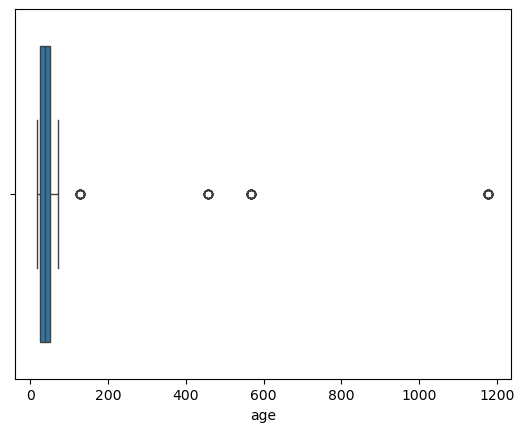

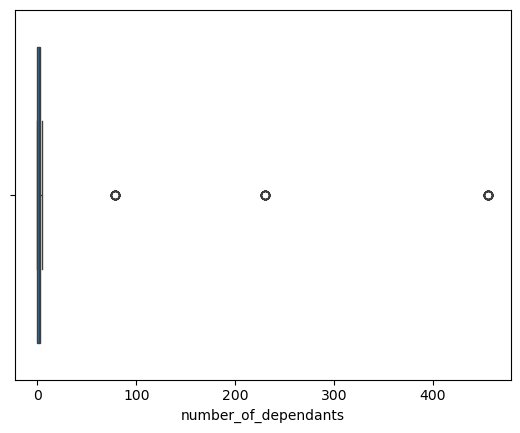

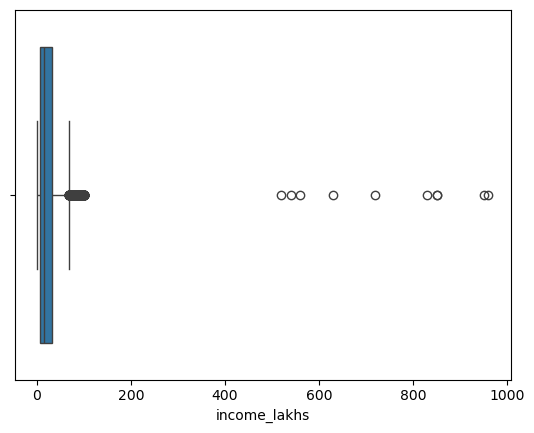

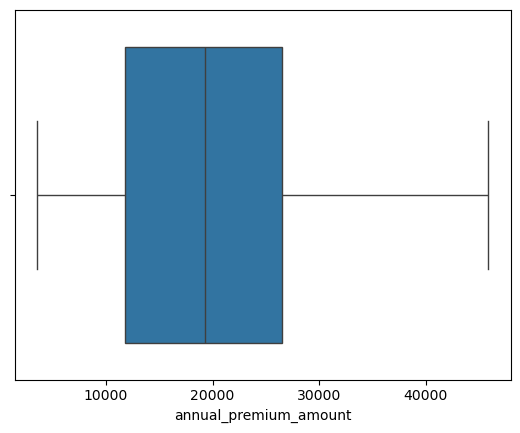

In [401]:
for col in numeric_col:
    sbn.boxplot(x=df[col])
    plt.show()

In [402]:
df[df['age']>100]['age'].unique()

array([ 128, 1178,  567,  456])

In [403]:
df1 = df[df['age']<100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,9915.000000,9915.000000,9915.000000,9915.000000
mean,37.743621,3.203429,23.400807,19496.715784
std,13.975462,21.742340,32.398236,8899.088302
min,18.000000,0.000000,1.000000,3582.000000
25%,24.000000,0.000000,6.000000,11765.500000
50%,37.000000,2.000000,16.000000,19309.000000
75%,50.000000,3.000000,31.000000,26493.000000
max,72.000000,456.000000,960.000000,45854.000000


In [404]:
def get_iqr_bounds(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return lower, upper

In [405]:
get_iqr_bounds(df1.income_lakhs) ## we can use this upper bond here but can use common sense as well for example just use quantile

(-31.5, 68.5)

In [406]:
income_thre = df1['income_lakhs'].quantile(0.999)
income_thre

136.12000000048283

In [407]:
df1[df1['income_lakhs']> income_thre].shape

(10, 15)

In [408]:
df2 = df1[df1['income_lakhs']<income_thre].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,9905.000000,9905.000000,9905.000000,9905.000000
mean,37.751843,3.205553,22.676325,19499.125088
std,13.974916,21.753158,22.453983,8898.743837
min,18.000000,0.000000,1.000000,3582.000000
25%,24.000000,0.000000,6.000000,11767.000000
50%,37.000000,2.000000,16.000000,19314.000000
75%,50.000000,3.000000,31.000000,26493.000000
max,72.000000,456.000000,100.000000,45854.000000


In [409]:
df2.shape

(9905, 15)

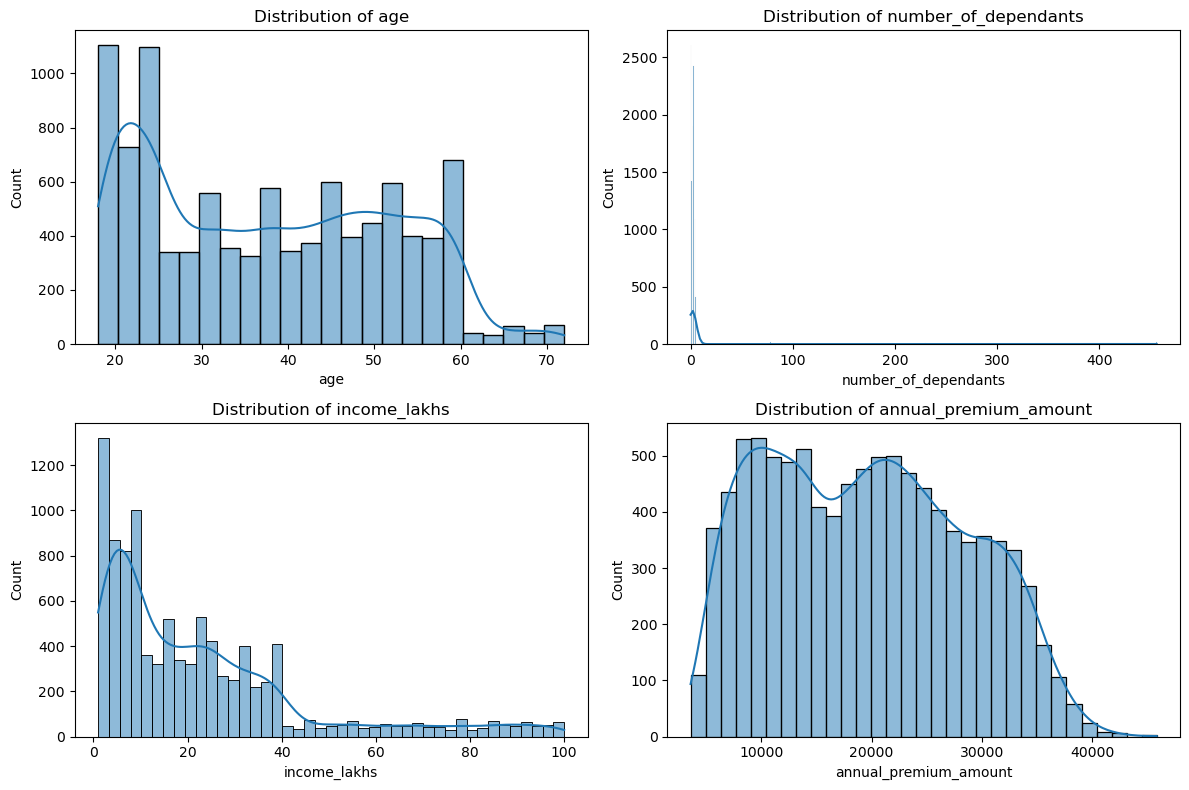

In [410]:
# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes array for easy looping
axes = axes.flatten()

for i, col in enumerate(numeric_col):
    sbn.histplot(x=df2[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [411]:
df2 = df2[df2['number_of_dependants']<=5]

In [412]:
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,9858.000000,9858.000000,9858.000000,9858.000000
mean,37.764760,1.919963,22.683709,19513.853419
std,13.976268,1.503027,22.453283,8900.593367
min,18.000000,0.000000,1.000000,3582.000000
25%,24.000000,0.000000,6.000000,11777.000000
50%,37.000000,2.000000,16.000000,19331.500000
75%,50.000000,3.000000,31.000000,26505.750000
max,72.000000,5.000000,100.000000,45854.000000


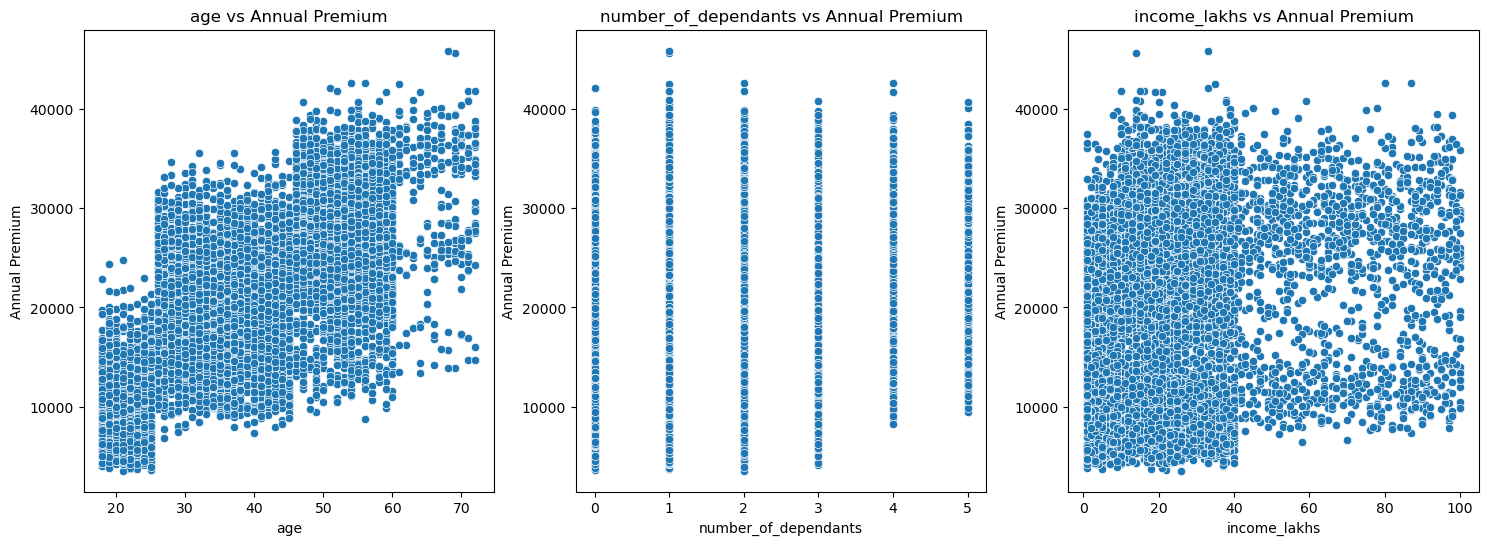

In [413]:
numeric_features = ['age', 'number_of_dependants', 'income_lakhs']
fig, axes = plt.subplots(1, len(numeric_features), figsize=(18,6))

for ax, col in zip(axes, numeric_features):
    sbn.scatterplot(x=df2[col], y=df2['annual_premium_amount'], ax=ax)
    ax.set_title(f'{col} vs Annual Premium')
    ax.set_xlabel(col)
    ax.set_ylabel("Annual Premium")

plt.show()

In [414]:
cat_col = df.select_dtypes(['object', 'string']).columns
cat_col

Index(['gender', 'region', 'marital_status', 'physical_activity',
       'stress_level', 'bmi_category', 'smoking_status', 'employment_status',
       'income_level', 'medical_history', 'insurance_plan'],
      dtype='object')

In [415]:
for col in cat_col:
    print(col, df[col].unique())

gender ['Female' 'Male']
region ['Southeast' 'Northeast' 'Southwest' 'Northwest']
marital_status ['Unmarried' 'Married']
physical_activity ['Medium' 'Low' 'High']
stress_level ['Medium' 'High' 'Low']
bmi_category ['Normal' 'Overweight' 'Obesity' 'Underweight']
smoking_status ['No Smoking' 'Occasional' 'Regular']
employment_status ['Self-Employed' 'Freelancer' 'Salaried']
income_level ['25L - 40L' '10L - 25L' '<10L' '> 40L']
medical_history ['High blood pressure' 'No Disease' 'Thyroid'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid' 'Diabetes'
 'Heart disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease']
insurance_plan ['Gold' 'Silver' 'Bronze']


In [416]:
df2['smoking_status'].replace({
    'Smoking=0': 'No Smoking',
    'Does Not Smoke': 'No Smoking',
    'Not Smoking': 'No Smoking'
}, inplace=True)
df2['smoking_status'].unique()

/var/folders/qf/y5py1tn96jb51xf2nngtndw80000gn/T/ipykernel_5291/321161999.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({


array(['No Smoking', 'Occasional', 'Regular'], dtype=object)

In [417]:
pct_gender = df2['gender'].value_counts(normalize=True)
pct_gender

gender
Female    0.598702
Male      0.401298
Name: proportion, dtype: float64

<Axes: xlabel='gender'>

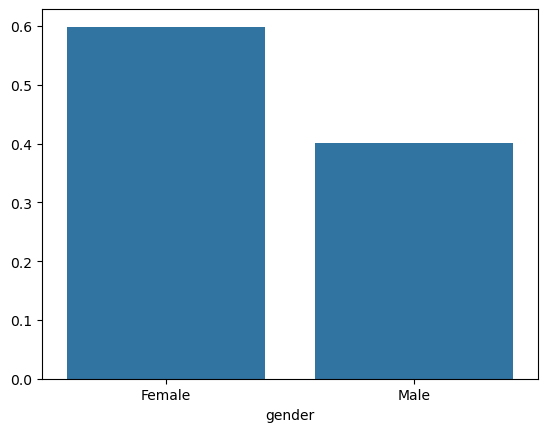

In [418]:
sbn.barplot(x=pct_gender.index, y=pct_gender.values)

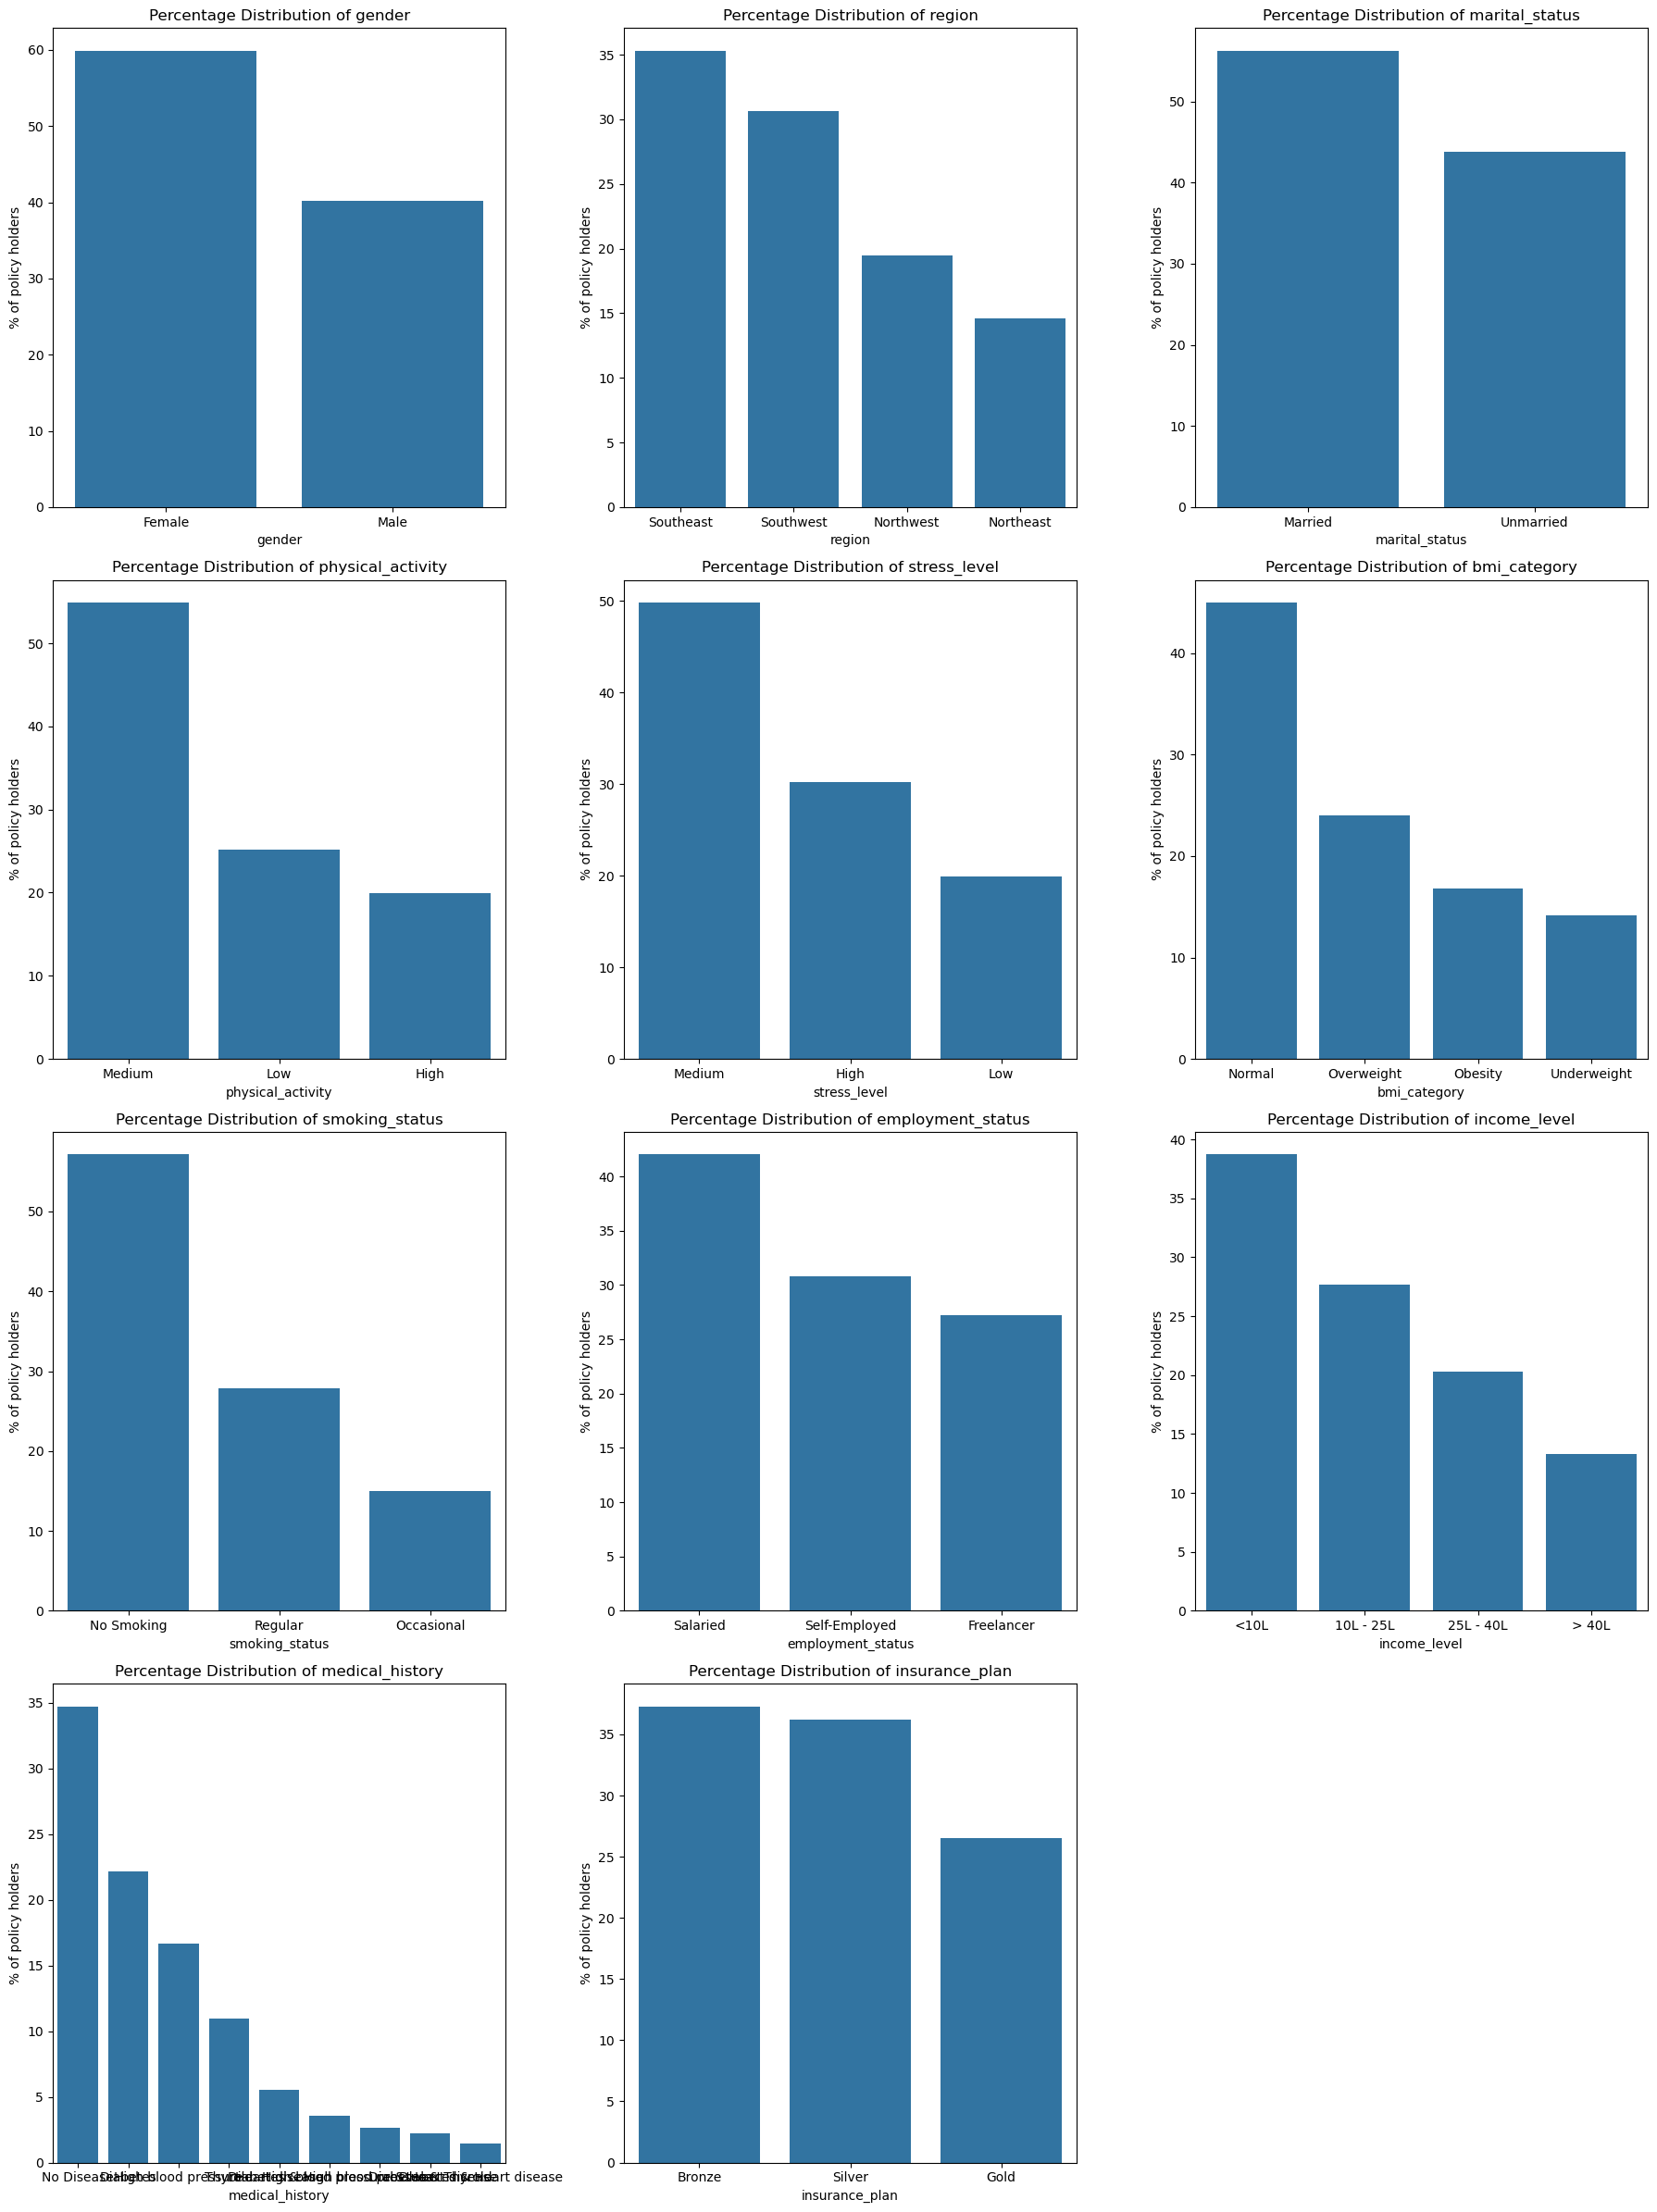

In [419]:
fig, axes = plt.subplots(4, 3, figsize=(18, 24))  # 4 rows x 3 columns = 12 plots
axes = axes.flatten()

for ax, col in zip(axes, cat_col):
    cat_count = df2[col].value_counts(normalize=True) * 100
    sbn.barplot(x=cat_count.index, y=cat_count.values, ax=ax)
    ax.set_title(f'Percentage Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel("% of policy holders")

# Hide any unused axes (e.g., the 12th one if only 11 plots needed)
for i in range(len(cat_col), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [420]:
cross_tab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
cross_tab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,822,909,998
25L - 40L,533,733,733
<10L,2266,184,1366
> 40L,55,788,471


<Axes: xlabel='income_level'>

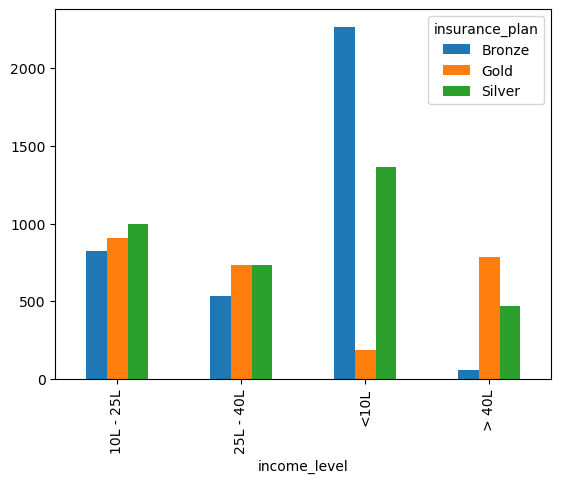

In [421]:
cross_tab.plot(kind="bar")

<Axes: xlabel='insurance_plan', ylabel='income_level'>

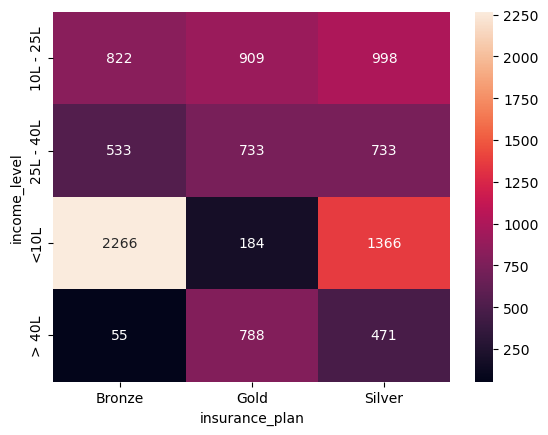

In [422]:
sbn.heatmap(cross_tab, annot=True, fmt='d')

In [423]:
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

In [424]:
df2[['disease1','disease2']]=df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())

In [425]:
df2.head()

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944,high blood pressure,None
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108,no disease,None
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,<10L,9,No Disease,Bronze,8459,no disease,None
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,<10L,9,Thyroid,Silver,21685,thyroid,None
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,10L - 25L,13,High blood pressure & Heart disease,Bronze,15984,high blood pressure,heart disease


In [426]:
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)
df2['total_risk_score'] = 0

for disease in ['disease1','disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head(2)

/var/folders/qf/y5py1tn96jb51xf2nngtndw80000gn/T/ipykernel_5291/3623383084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace=True)
/var/folders/qf/y5py1tn96jb51xf2nngtndw80000gn/T/ipykernel_5291/3623383084.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944,high blood pressure,none,6,0.428571
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108,no disease,none,0,0.000000


In [469]:
df2['insurance_plan'] = df2['insurance_plan'].map({
    'Bronze':1,
    'Silver':2,
    'Gold':3
})
df2['insurance_plan'].unique()

array([3, 2, 1])

In [471]:
df2['income_level'].unique()

array(['25L - 40L', '10L - 25L', '<10L', '> 40L'], dtype=object)

In [473]:
df2.head()

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,3,27944,high blood pressure,none,6,0.428571
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,2,21108,no disease,none,0,0.000000
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,<10L,9,No Disease,1,8459,no disease,none,0,0.000000
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,<10L,9,Thyroid,2,21685,thyroid,none,5,0.357143
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,10L - 25L,13,High blood pressure & Heart disease,1,15984,high blood pressure,heart disease,14,1.000000


In [475]:
df2['income_level'] = df2['income_level'].map({
    '<10L':1,
    '10L - 25L':2,
    '25L - 40L':3,
    '> 40L':4
})
df2['income_level'].unique()

array([3, 2, 1, 4])

In [477]:
df2.head()

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,3,37,High blood pressure,3,27944,high blood pressure,none,6,0.428571
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,2,10,No Disease,2,21108,no disease,none,0,0.000000
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,1,9,No Disease,1,8459,no disease,none,0,0.000000
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,1,9,Thyroid,2,21685,thyroid,none,5,0.357143
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,2,13,High blood pressure & Heart disease,1,15984,high blood pressure,heart disease,14,1.000000


In [479]:
df2['physical_activity'].unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [481]:
df2['physical_activity'] = df2['physical_activity'].map({
    'High':0,
    'Medium':1,
    'Low':4
})
df2.head()

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,56,Female,Southeast,Unmarried,1,Medium,2,Normal,No Smoking,Self-Employed,3,37,High blood pressure,3,27944,high blood pressure,none,6,0.428571
1,38,Female,Northeast,Married,4,High,5,Overweight,Occasional,Freelancer,2,10,No Disease,2,21108,no disease,none,0,0.000000
2,18,Female,Southwest,Unmarried,1,High,0,Normal,No Smoking,Freelancer,1,9,No Disease,1,8459,no disease,none,0,0.000000
3,55,Male,Northeast,Married,0,Medium,3,Overweight,Occasional,Salaried,1,9,Thyroid,2,21685,thyroid,none,5,0.357143
4,22,Male,Southeast,Unmarried,1,High,2,Normal,Regular,Self-Employed,2,13,High blood pressure & Heart disease,1,15984,high blood pressure,heart disease,14,1.000000


In [483]:
df2['stress_level'] = df2['stress_level'].map({
    'High':4,
    'Medium':1,
    'Low':0
})
df2.head()

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,56,Female,Southeast,Unmarried,1,1,2,Normal,No Smoking,Self-Employed,3,37,High blood pressure,3,27944,high blood pressure,none,6,0.428571
1,38,Female,Northeast,Married,4,4,5,Overweight,Occasional,Freelancer,2,10,No Disease,2,21108,no disease,none,0,0.000000
2,18,Female,Southwest,Unmarried,1,4,0,Normal,No Smoking,Freelancer,1,9,No Disease,1,8459,no disease,none,0,0.000000
3,55,Male,Northeast,Married,0,1,3,Overweight,Occasional,Salaried,1,9,Thyroid,2,21685,thyroid,none,5,0.357143
4,22,Male,Southeast,Unmarried,1,4,2,Normal,Regular,Self-Employed,2,13,High blood pressure & Heart disease,1,15984,high blood pressure,heart disease,14,1.000000


In [487]:
df2['life_style_risk_score'] = df2['physical_activity']+df2['stress_level']
max_score = df2['life_style_risk_score'].max()
min_score = df2['life_style_risk_score'].min()
df2['normalized_life_style_risk_score'] = (df2['life_style_risk_score'] - min_score) / (max_score - min_score)
df2.head(2)

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,...,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score,life_style_risk_score,normalized_life_style_risk_score
0,56,Female,Southeast,Unmarried,1,1,2,Normal,No Smoking,Self-Employed,...,37,High blood pressure,3,27944,high blood pressure,none,6,0.428571,2,0.25
1,38,Female,Northeast,Married,4,4,5,Overweight,Occasional,Freelancer,...,10,No Disease,2,21108,no disease,none,0,0.000000,8,1.00


In [489]:
nominal_col = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status','employment_status']
df3 = pd.get_dummies(df2, columns=nominal_col, drop_first=True, dtype=int)
df3.head()

,age,physical_activity,stress_level,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,56,1,1,2,3,37,High blood pressure,3,27944,high blood pressure,...,1,0,1,0,0,0,0,0,0,1
1,38,4,4,5,2,10,No Disease,2,21108,no disease,...,0,0,0,0,1,0,1,0,0,0
2,18,1,4,0,1,9,No Disease,1,8459,no disease,...,0,1,1,0,0,0,0,0,0,0
3,55,0,1,3,1,9,Thyroid,2,21685,thyroid,...,0,0,0,0,1,0,1,0,1,0
4,22,1,4,2,2,13,High blood pressure & Heart disease,1,15984,high blood pressure,...,1,0,1,0,0,0,0,1,0,1


In [491]:
df4 = df3.drop(['disease1','disease2', 'total_risk_score', 'medical_history', 'life_style_risk_score'], axis=1)
df4.head()

,age,physical_activity,stress_level,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,normalized_life_style_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,56,1,1,2,3,37,3,27944,0.428571,0.250,...,1,0,1,0,0,0,0,0,0,1
1,38,4,4,5,2,10,2,21108,0.000000,1.000,...,0,0,0,0,1,0,1,0,0,0
2,18,1,4,0,1,9,1,8459,0.000000,0.625,...,0,1,1,0,0,0,0,0,0,0
3,55,0,1,3,1,9,2,21685,0.357143,0.125,...,0,0,0,0,1,0,1,0,1,0
4,22,1,4,2,2,13,1,15984,1.000000,0.625,...,1,0,1,0,0,0,0,1,0,1


In [497]:
df4 = df4.drop(['physical_activity','stress_level'], axis=1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,normalized_life_style_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,56,2,3,37,3,27944,0.428571,0.250,0,0,1,0,1,0,0,0,0,0,0,1
1,38,5,2,10,2,21108,0.000000,1.000,0,0,0,0,0,0,1,0,1,0,0,0
2,18,0,1,9,1,8459,0.000000,0.625,0,0,0,1,1,0,0,0,0,0,0,0
3,55,3,1,9,2,21685,0.357143,0.125,1,0,0,0,0,0,1,0,1,0,1,0
4,22,2,2,13,1,15984,1.000000,0.625,1,0,1,0,1,0,0,0,0,1,0,1


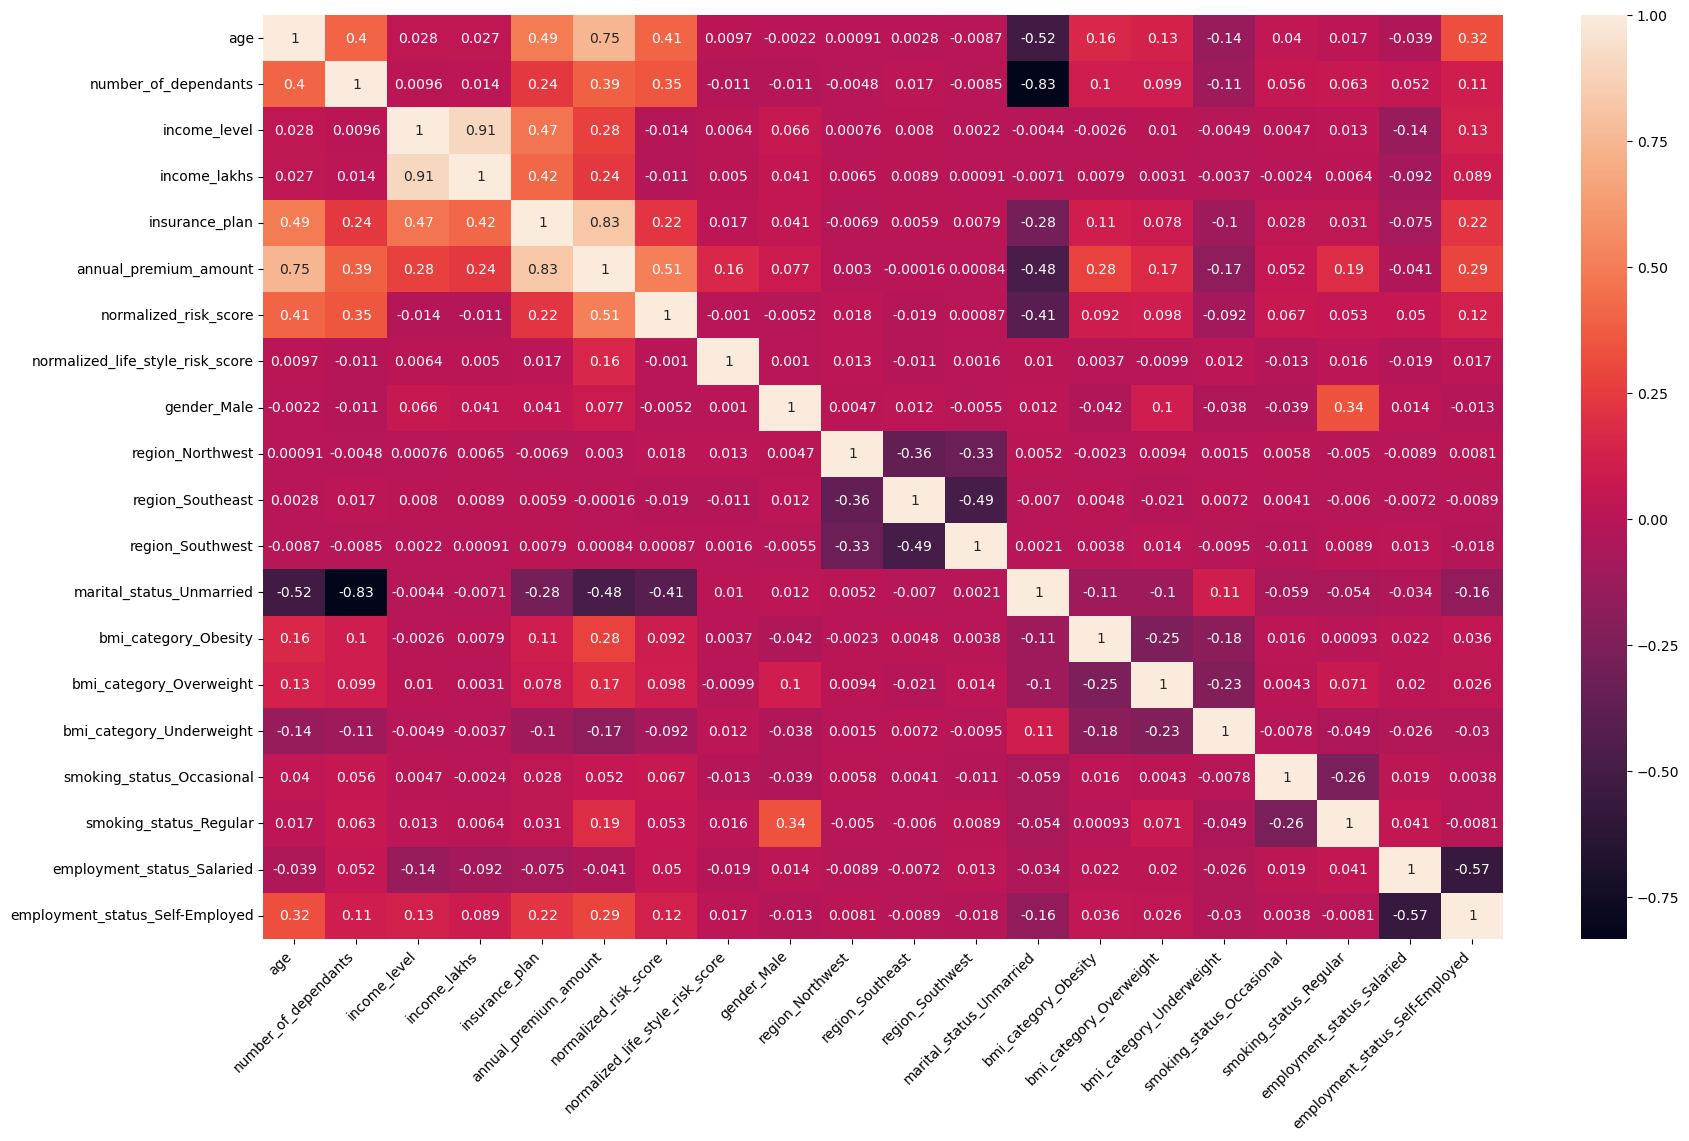

In [499]:
cm = df4.corr()

plt.figure(figsize=(20,12))
sbn.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [501]:
df4.head(2)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,normalized_life_style_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,56,2,3,37,3,27944,0.428571,0.25,0,0,1,0,1,0,0,0,0,0,0,1
1,38,5,2,10,2,21108,0.000000,1.00,0,0,0,0,0,0,1,0,1,0,0,0


In [503]:
X = df4.drop('annual_premium_amount', axis=1)
y= df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler

col_to_scale = ['age', 'number_of_dependants', 'income_level', 'income_lakhs', 'insurance_plan']
scaler = MinMaxScaler()

X[col_to_scale] = scaler.fit_transform(X[col_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,normalized_life_style_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000
mean,0.366014,0.383993,0.360756,0.219027,0.446135,0.326537,0.408349,0.401298,0.194664,0.353013,0.306452,0.437716,0.167985,0.240414,0.141712,0.150030,0.278657,0.420065,0.308176
std,0.258820,0.300605,0.352198,0.226801,0.395765,0.279083,0.268302,0.490186,0.395962,0.477931,0.461043,0.496131,0.373872,0.427356,0.348773,0.357119,0.448361,0.493594,0.461763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.050505,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.351852,0.400000,0.333333,0.151515,0.500000,0.428571,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.592593,0.600000,0.666667,0.303030,1.000000,0.428571,0.625000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [505]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [507]:
calculate_vif(X)

,Column,VIF
0,age,5.541063
1,number_of_dependants,5.320401
2,income_level,12.548788
3,income_lakhs,10.947288
4,insurance_plan,4.147071
5,normalized_risk_score,3.001706
6,normalized_life_style_risk_score,3.110913
7,gender_Male,1.910118
8,region_Northwest,2.082989
9,region_Southeast,2.952809


In [509]:
calculate_vif(X.drop('income_level', axis=1))

,Column,VIF
0,age,5.488217
1,number_of_dependants,5.306542
2,income_lakhs,2.450579
3,insurance_plan,3.875312
4,normalized_risk_score,3.001684
5,normalized_life_style_risk_score,3.110034
6,gender_Male,1.901611
7,region_Northwest,2.082813
8,region_Southeast,2.951877
9,region_Southwest,2.678296


In [511]:
X_reduced = X.drop('income_level', axis=1)
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,normalized_life_style_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.703704,0.4,0.363636,1.0,0.428571,0.250,0,0,1,0,1,0,0,0,0,0,0,1
1,0.370370,1.0,0.090909,0.5,0.000000,1.000,0,0,0,0,0,0,1,0,1,0,0,0
2,0.000000,0.0,0.080808,0.0,0.000000,0.625,0,0,0,1,1,0,0,0,0,0,0,0
3,0.685185,0.6,0.080808,0.5,0.357143,0.125,1,0,0,0,0,0,1,0,1,0,1,0
4,0.074074,0.4,0.121212,0.0,1.000000,0.625,1,0,1,0,1,0,0,0,0,1,0,1


In [513]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.30, random_state=10)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
train_score = model_lr.score(X_train, y_train)
test_score = model_lr.score(X_test, y_test)

print(train_score, test_score)

0.9586426437876246 0.9572516785678009


In [515]:
model_lr.coef_, model_lr.intercept_

(array([ 1.06758379e+04, -6.71110352e+02, -7.08275605e+02,  1.33118468e+04,
         6.52143869e+03,  4.72438663e+03,  1.19610216e+01,  7.70618764e+01,
         8.83253087e+01, -9.70125833e+00, -8.20804958e+02,  4.16609646e+03,
         2.11921567e+03,  4.13650051e+02,  1.15950875e+03,  3.11648269e+03,
         1.78946517e+01,  3.82995584e+02]),
 3892.5016653908406)

In [517]:
feature_importances = model_lr.coef_

coef_df = pd.DataFrame(feature_importances, index=X_test.columns, columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)
coef_df

,Coefficients
marital_status_Unmarried,-820.804958
income_lakhs,-708.275605
number_of_dependants,-671.110352
region_Southwest,-9.701258
gender_Male,11.961022
employment_status_Salaried,17.894652
region_Northwest,77.061876
region_Southeast,88.325309
employment_status_Self-Employed,382.995584
bmi_category_Underweight,413.650051


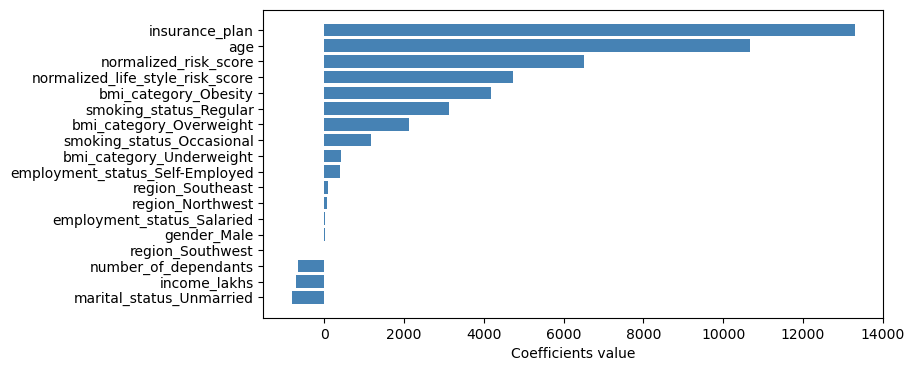

In [519]:
plt.figure(figsize=(8,4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel("Coefficients value")
plt.show()

In [521]:
from xgboost import XGBRegressor

model_xg = XGBRegressor()
model_xg.fit(X_train, y_train)
train_score = model_xg.score(X_train, y_train)
test_score = model_xg.score(X_test, y_test)
print(train_score, test_score)

0.9980030655860901 0.9939571022987366


In [523]:
y_pred = model_xg.predict(X_test)

print("R2 Score", r2_score(y_pred, y_test))
print("Mean Square Error", mean_squared_error(y_pred, y_test))
print("Root Square Error", np.sqrt(mean_squared_error(y_pred, y_test)))

R2 Score 0.993945300579071
Mean Square Error 469429.3406210002
Root Square Error 685.1491375029236


In [525]:
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
random_search.best_score_

0.9925432205200195

In [527]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [577]:
best_model = random_search.best_estimator_

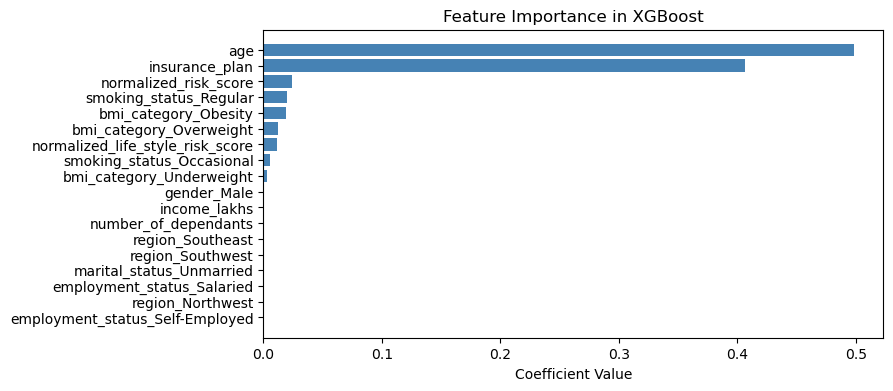

In [579]:
feature_importance = best_model.feature_importances_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost')
plt.show()

In [581]:
#best_model= model_lr
y_pred = best_model.predict(X_test)
residuals = y_test-y_pred
residual_pct = residuals*100/y_test

results_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'diff': residuals,
    'diff_pct': residual_pct
})
results_df.head()


,actual,predicted,diff,diff_pct
3021,13354,12226.655273,1127.344727,8.442000
6049,10701,11696.637695,-995.637695,-9.304156
6146,15146,16290.446289,-1144.446289,-7.556096
6418,8743,9265.954102,-522.954102,-5.981403
1537,27887,26731.242188,1155.757812,4.144432


<Axes: xlabel='diff_pct', ylabel='Count'>

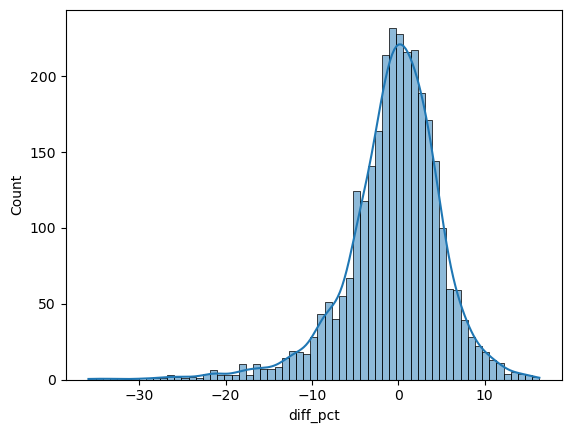

In [583]:
sbn.histplot(results_df['diff_pct'], kde=True)

In [585]:
extreme_error_threshold = 10
extreme_results_df = results_df[np.abs(results_df['diff_pct'])>extreme_error_threshold]
extreme_results_df.shape

(204, 4)

In [587]:
results_df.shape

(2958, 4)

In [589]:
extreme_error_pct = extreme_results_df.shape[0]*100/results_df.shape[0]
extreme_error_pct

6.896551724137931

In [593]:
##There are 6.9% extreme errors for XGBoost with parameters {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}
##we will choose this as our threshold is 10.